In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [4]:
Delay=pd.read_csv("ws_01_AirlineDelay.csv")
Delay

,Flight,Carrier,Month,DayOfWeek,NumPrevFlights,PrevFlightGap,HistoricallyLate,InsufficientHistory,OriginInVolume,OriginOutVolume,...,OriginWindGust,OriginFog,OriginThunder,DestPrecip,DestAvgWind,DestWindGust,DestFog,DestThunder,TotalDelay,DelayClass
0,LAX-ORD,American Airlines,June,Wednesday,1,55,0.000000,1,1.053360,1.026930,...,19.908766,0,0,132,7.381902,16.105968,0,0,25,Major
1,LAX-ORD,American Airlines,June,Thursday,1,55,0.000000,1,1.021611,1.019608,...,18.119214,0,0,0,10.066230,23.935258,0,0,0,NoDelay
2,LAX-ORD,American Airlines,June,Friday,2,35,0.000000,1,1.029703,0.998214,...,16.105968,1,0,0,9.842536,18.119214,0,0,0,NoDelay
3,LAX-ORD,American Airlines,June,Sunday,1,30,0.250000,0,1.087935,1.001789,...,17.000744,0,0,0,15.658580,31.988242,0,0,0,NoDelay
4,LAX-ORD,American Airlines,June,Monday,1,55,0.200000,0,1.044177,0.994662,...,18.119214,0,0,0,8.724066,17.000744,0,0,0,NoDelay
5,LAX-ORD,American Airlines,June,Tuesday,1,55,0.166667,0,1.025641,1.014870,...,17.000744,0,0,0,12.526864,27.961750,0,0,10,Minor
6,LAX-ORD,American Airlines,June,Wednesday,1,55,0.285714,0,1.053360,1.003591,...,14.987498,0,0,165,10.289924,31.988242,0,0,64,Major
7,LAX-ORD,American Airlines,June,Thursday,2,55,0.375000,0,1.021611,1.019608,...,17.000744,1,0,81,8.276678,17.000744,0,0,70,Major
8,LAX-ORD,American Airlines,June,Friday,1,55,0.333333,0,1.029703,1.021429,...,16.105968,1,0,3,8.500372,16.105968,0,0,0,NoDelay
9,LAX-ORD,American Airlines,June,Saturday,1,5,0.400000,0,1.024775,0.936441,...,14.092722,0,0,325,7.381902,31.093466,0,0,139,Major


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: module 'seaborn' has no attribute 'plot'

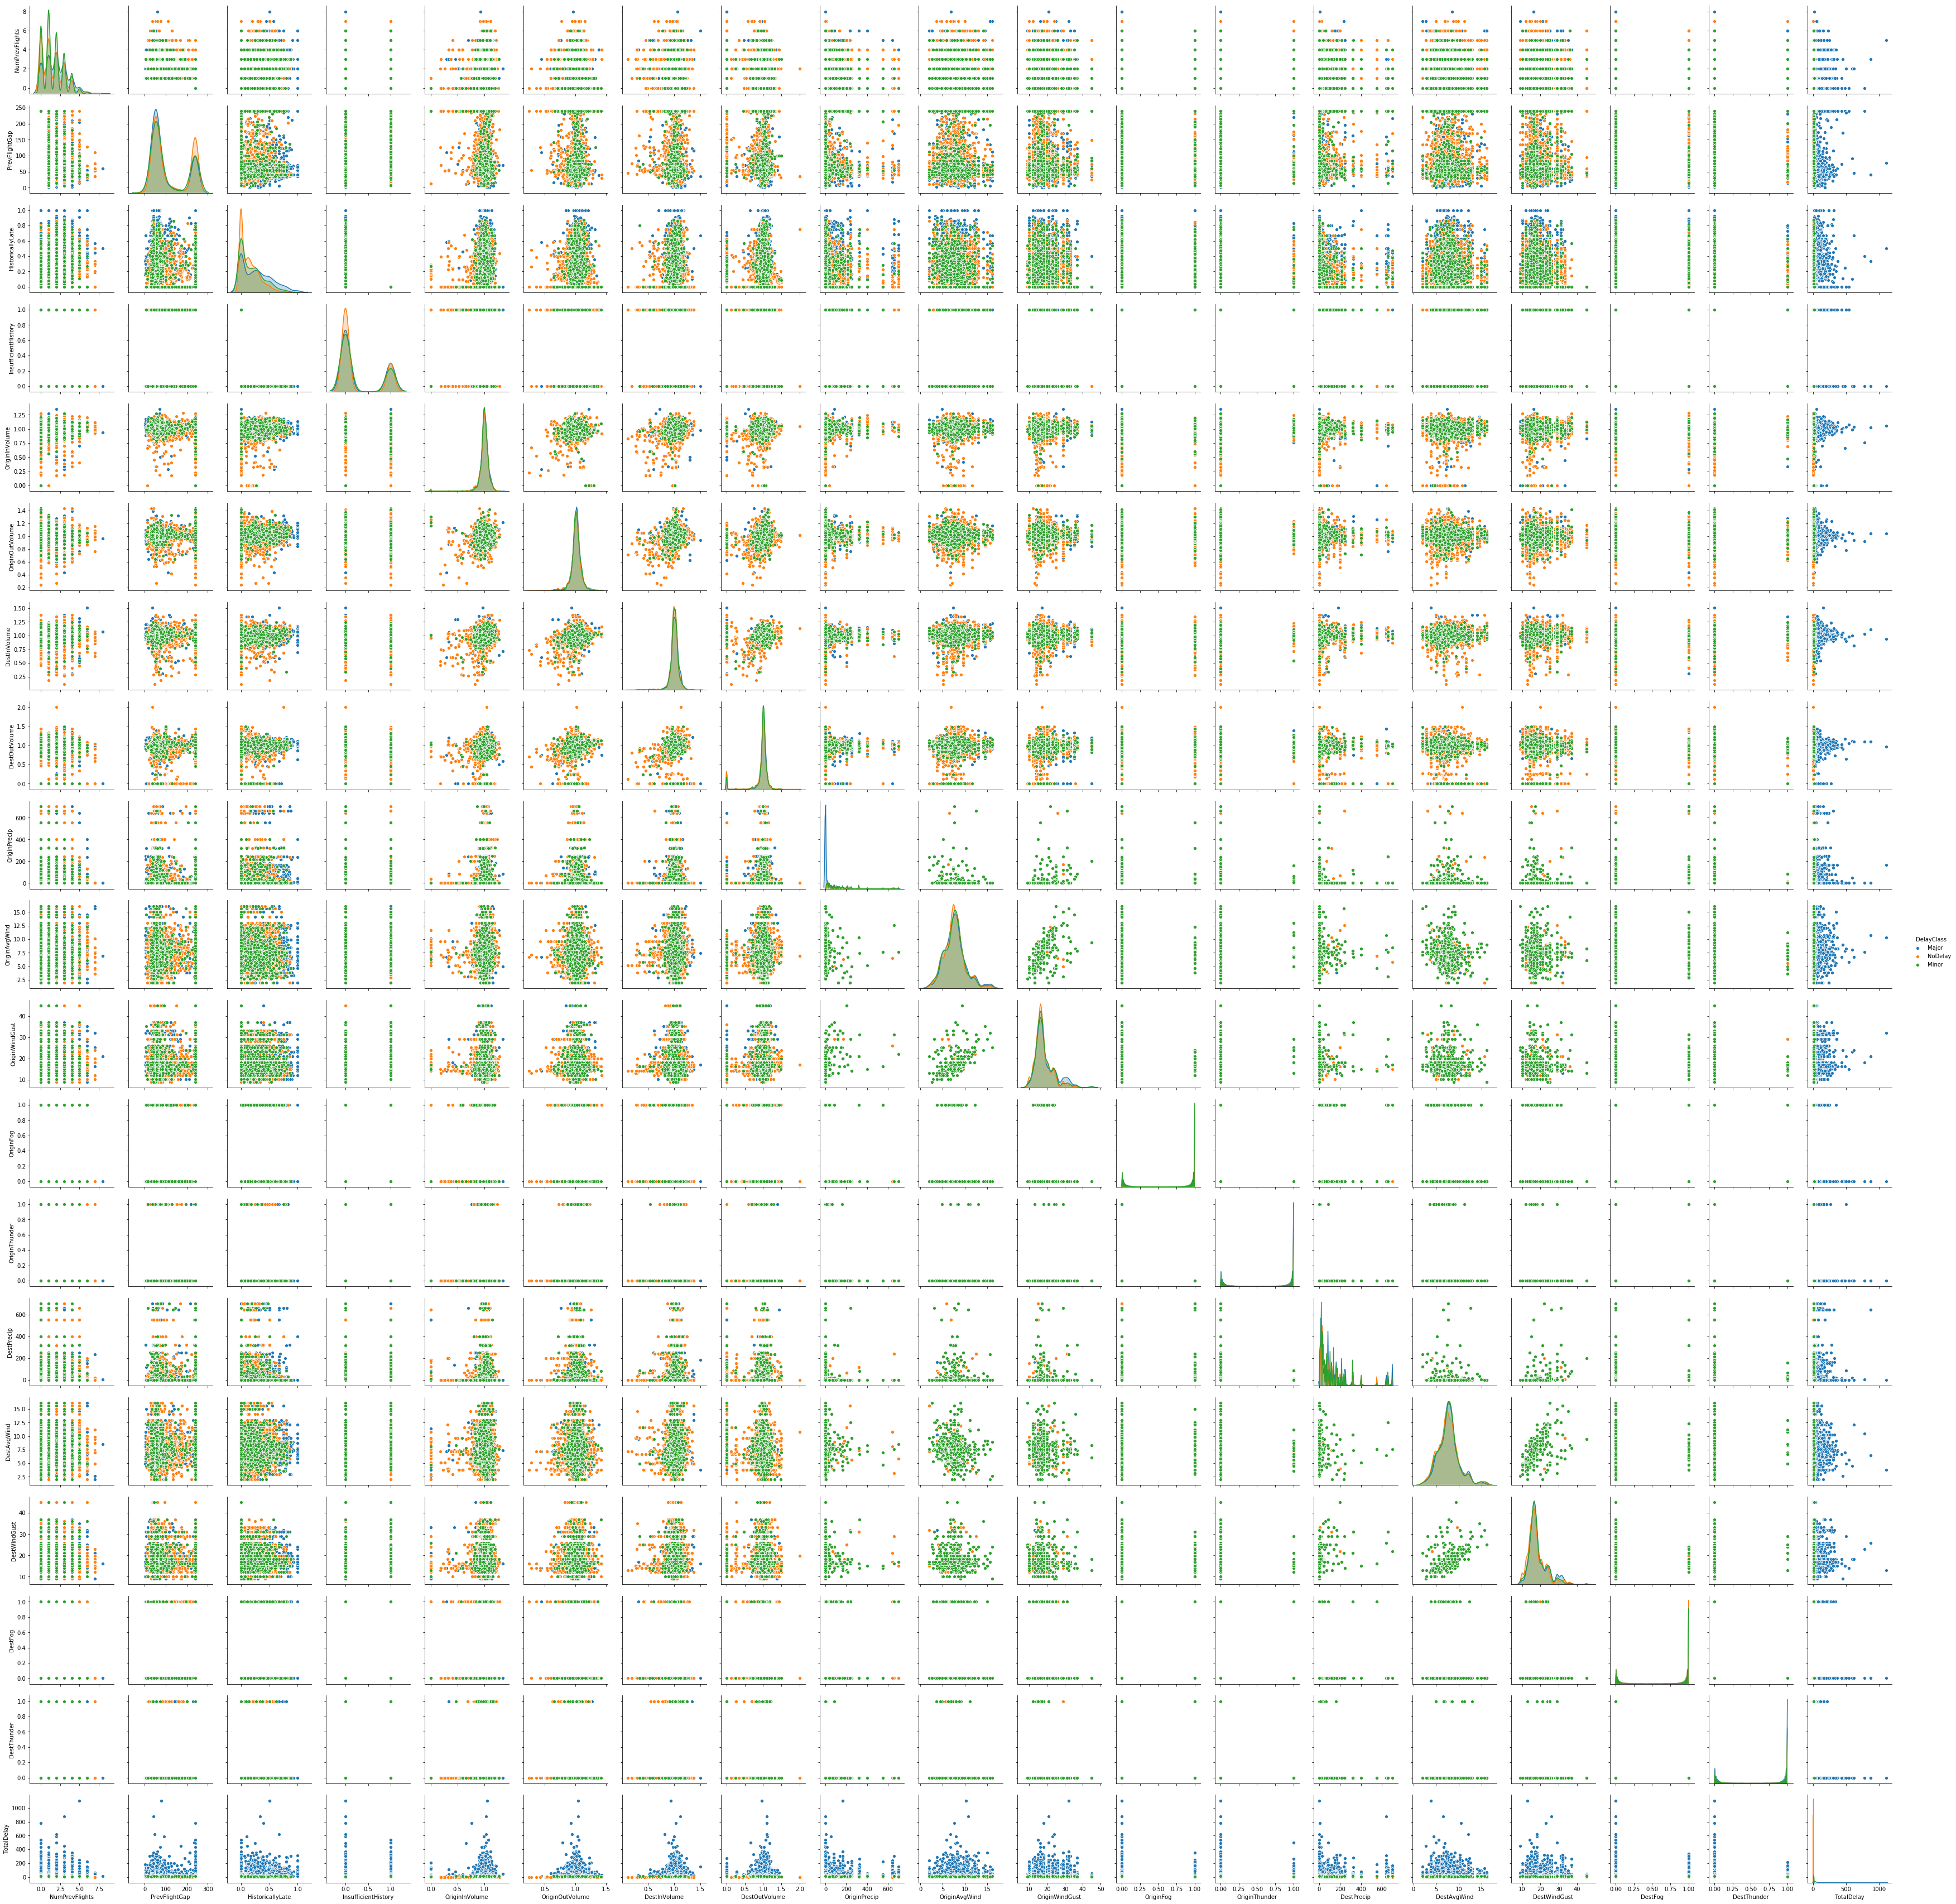

In [5]:
sns.pairplot(Delay, diag_kind="kde", hue="DelayClass")

In [6]:
Delay = pd.get_dummies(Delay, prefix_sep='_').drop(Delay['TotalDelay'])
Delay

,NumPrevFlights,PrevFlightGap,HistoricallyLate,InsufficientHistory,OriginInVolume,OriginOutVolume,DestInVolume,DestOutVolume,OriginPrecip,OriginAvgWind,...,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DelayClass_Major,DelayClass_Minor,DelayClass_NoDelay
148,0,240,0.000000,1,0.909404,1.071930,0.866667,0.900000,0,9.842536,...,0,0,0,0,0,1,0,0,0,1
158,0,240,0.000000,1,0.897059,1.217314,0.998400,1.110057,249,4.921268,...,0,0,0,0,1,0,0,1,0,0
171,2,55,0.000000,1,1.027668,1.009709,0.894737,1.037106,0,9.842536,...,0,0,0,0,0,1,0,0,0,1
175,1,45,0.428571,0,0.883686,0.995968,0.979899,0.747126,20,7.605596,...,0,0,1,0,0,0,0,0,0,1
187,1,55,0.111111,0,0.984334,0.991883,0.976285,1.012681,81,8.276678,...,0,0,0,0,1,0,0,1,0,0
188,1,90,0.100000,0,0.996037,1.038270,0.984064,1.039033,3,8.500372,...,1,0,0,0,0,0,0,0,0,1
191,1,55,0.076923,0,0.986911,1.024116,0.978218,1.012681,13,5.592350,...,0,1,0,0,0,0,0,0,0,1
192,1,55,0.071429,0,0.976285,1.030744,0.947368,1.037106,104,4.697574,...,0,0,0,0,0,1,0,0,1,0
195,1,55,0.117647,0,1.013210,1.081531,0.984064,1.039033,0,9.842536,...,1,0,0,0,0,0,0,1,0,0
201,1,55,0.130435,0,0.950392,1.012987,1.027668,1.012681,18,6.710820,...,0,0,0,0,1,0,0,0,0,1


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [8]:
array = Delay.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 3  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [9]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7382084095063985
[[2019    0    0 ...    0    0    0]
 [  98    0    0 ...    0    0    0]
 [  19    0    0 ...    0    0    0]
 ...
 [   8    0    0 ...    0    0    0]
 [  13    0    0 ...    0    0    0]
 [  11    0    0 ...    0    0    0]]


In [10]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.76      0.41      0.53      2019
         3.0       0.00      0.00      0.00        98
         5.0       0.00      0.00      0.00        19
         8.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00        17
        13.0       0.00      0.00      0.00        43
        18.0       0.00      0.00      0.00        36
        20.0       0.00      0.00      0.00        35
        23.0       0.00      0.00      0.00        10
        25.0       0.00      0.10      0.01        10
        30.0       0.00      0.00      0.00        33
        33.0       0.00      0.00      0.00        13
        36.0       0.00      0.00      0.00        26
        38.0       0.00      0.00      0.00        11
        41.0       0.00      0.00      0.00         8
        43.0       0.00      0.00      0.00        14
        48.0       0.00      0.00      0.00         8
        51.0       0.00    

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
